# Project 1 - Titanic - Part I - [Your Name]

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

## 1) Upload this jupyter notebook page to your colab




## 2) Get the Shareable link for your page and update the URL below for your Jupyter Notebook:
- _Make sure you select __'Anyone with the Link'__ option_

__This jupyter notebook page is located at__: https://colab.research.google.com/drive/1w12CtRzzFGEzaOM3d07QqIUlX4f6M_DU?usp=sharing

We will click on the link above to visit to your Jupyter Notebook page.

## 3) Get the Data:
### Download the data (train.csv and test.csv files) from Kaggle and then upload them using the first code block below. 
- To download the files, login to [Kaggle](https://www.kaggle.com/) and go to the [Titanic challenge](https://www.kaggle.com/c/titanic)


Keep the following code block as it is. Use it to upload the donwloaded csv files and to save them into your colab:

In [ ]:
from google.colab import files
import pandas as pd
import io
import os

train_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('train.csv') #remove the file created during upload that is in the root folder
train_data = pd.read_csv(io.StringIO(train_data_dict['train.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

test_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('test.csv') #remove the file created during upload that is in the root folder
test_data = pd.read_csv(io.StringIO(test_data_dict['test.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

titanic_dir_path = os.path.join("datasets", "titanic")
os.makedirs(titanic_dir_path, exist_ok=True) #create the folder
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file 
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data.to_csv(train_csv_path, index=False) #save the data to csv file
test_data.to_csv(test_csv_path, index=False) #save the data to csv file

Saving train.csv to train.csv


Saving test.csv to test.csv


Once you upload the data, they will be saved into the `datasets/titanic` directory. After uploading, you don't need to upload them again. You can start run your code starting the below code block.

In [ ]:
import pandas as pd
import os

titanic_dir_path = os.path.join("datasets", "titanic")
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file 
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)


## Answer the Questions Below
## Discover, Visualize, Prepare Data:

###	4.1) Which attributes do we have, and what are they meaning? List the attributes and then briefly explain. To get the description of the attributes, you can do a little research on the web. No code is needed to answer this question.
-------------------------------------


Attributes:
Passenger ID: number associated with each passenger

Pclass: what class the passenger is in

Name: passenger name

Sex: what sex the passenger is

Age: age of passenger

Sibsp: how many siblings are with them

Parch: how many parents and/or children are with them

Ticket: ticket number of passenger

Fare: how much they paid for their ticket

Cabin: what room the passenger was staying in


### 4.2) Show your results and explain the insights you got by studying the data with each of the following methods on both the train and test data (Note: I am not looking for a long list of insights, 2-3 insights per method execution would be fine):


#### 4.2.a.	head()
-------------------------------------


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Insight 1: age seems to not correlate

Insight 2: when traveling as a family ticket cost increases

Insight 3: None of the above people had an assigned cabin

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Insight 1: Females were more likely to survive

Insight 2: Passengers with more expensive tickets are more likely to survive

#### 4.2.b.	info()
-------------------------------------


In [ ]:
test_data.info()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

Insight 1: Not many passengers have an assigned cabin

Insight 2: we have a dataset of 418 in the test set and 891 in the train set

#### 4.2.c.	describe()
-------------------------------------

In [ ]:
test_data.describe()
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survival rate was only around 38%

The youngest passenger was only ~5 months old where as the oldest passenger was 80 years old

#### 4.2.d.	value_counts()
-------------------------------------

In [ ]:
test_data.value_counts()
train_data.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
890          1         1       Behr, Mr. Karl Howell                                 male    26.0  0      0      111369    30.0000   C148   C           1
337          0         1       Pears, Mr. Thomas Clinton                             male    29.0  1      0      113776    66.6000   C2     S           1
332          0         1       Partner, Mr. Austen                                   male    45.5  0      0      113043    28.5000   C124   S           1
330          1         1       Hippach, Miss. Jean Gertrude                          female  16.0  0      1      111361    57.9792   B18    C           1
328          1         2       Ball, Mrs. (Ada E Hall)                               female  36.0  0      0      28551     13.0000   D      S           1
                                                                                 

Same insights as the other ones above not much new to report. These data points do all have cabin numbers where a lot of passengers didnt have one assigned to them

### 4.3)	Prepare a DataFrame that contains the following numeric fields: Survided, Sex, Age, SibSp, Parch, Fare. Plot these numeric fields on a histogram. Did you notice anything new using the histogram?

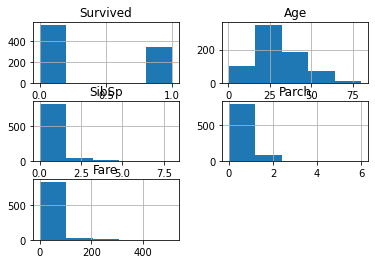

In [ ]:
df = pd.read_csv(train_csv_path, usecols = ['Survived', 'Sex', 'Age', 'SibSp','Parch','Fare'])
hist = df.hist(bins=5)

Almost all fares were less than $100 and I was correct on my earlier insight about avergae age

### 4.4) Use groupby of Pandas to explain the following questions. Study the examples listed on the following webapage about groupby and plot functions. Note that __PDFs of these webpages are attached__ to the assignment:
-	https://towardsdatascience.com/pandas-groupby-explained-453692519d0
-	https://medium.com/@sciencelee/making-plots-with-the-pandas-groupby-ac492941af28

For the following examples, use group by and plot for example:
> dataFrame.groupby(‘attribute1’)[‘attribute2’].median()

> dataFrame.groupby(‘attribute1’)[‘attribute2’].median().plot(kind=’bar’)


#### 4.4) a)	Find the average survival rate based on passenger class and plot the results.  What is the insight you gain? 



In [ ]:
train_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Most of the people in Pclass 1 survived

----------------------------------

#### 4.4) b)	Find the average survival rate based on sex and plot the results. What is the insight?

In [ ]:
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Almost 75% of passengers that survived were female

--------------------------------------

#### 4.4) c) Find the median age by Pclass and Sex.

In [ ]:
train_data.groupby(['Pclass', 'Sex'])[['Age']].median()

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

---------------------------------------------

#### 4.4) d)	Find out the median fare based on passenger class and embarked place. 

In [ ]:
train_data.groupby(['Pclass', 'Embarked'])[['Fare']].median()

Fare
Pclass Embarked         
1      C         78.2667
       Q         90.0000
       S         52.0000
2      C         24.0000
       Q         12.3500
       S         13.5000
3      C          7.8958
       Q          7.7500
       S          8.0500

-----------------------------

### 4.5) We will work on missing values on the whole data set. You can benefit from the following article for some of the questions below:
- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280

#### 4.5) a) Perform the followings:
- 1) Create a new 'all_data' frame by appending test data to train data. 

- 2) Using pandas methods see and show that some indexes repeat. Find a way to Use re-organize the index so that they are unique and do not have an extra 'index' column.

- 3) Then check the data using the info() method and list which columns have missing data (other than 'Survived')

In [ ]:
all_data = pd.concat([train_data, test_data])
all_data[all_data.index.duplicated()]
all_data = all_data[~all_data.index.duplicated()]
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


Age and Cabin are missing a lot where as embarked and fare are only missing 2 or 1 respectively

#### 4.5) b) Fill missing values of 'Age' field with the median age of the passenger class and sex that you found for the question above. Use the apply method with lambda function. 


In [ ]:
all_data['Age'] = all_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda age: age.fillna(age.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 130.5+ KB


#### 4.5) c) Fill missing values of 'Fare' field with the median fare of the passenger class and embarked location that you found for the question above. Use the apply method with lambda function. 

In [ ]:
all_data['Fare'] = all_data.groupby(['Pclass', 'Embarked'])['Fare'].apply(lambda x: x.fillna(x.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 130.5+ KB


#### 4.5) d) Fill missing values of 'Cabin' field with the 'NA' value.

In [ ]:
all_data['Cabin'] = all_data['Cabin'].fillna('NA')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 130.5+ KB


#### 4.5) e) Fill missing values of 'Embarked' field with the most frequently seen 'Embarked' value.

In [ ]:
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 130.5+ KB


## 5) Run all of your code and get your output

## 6) Print the latest status of your notebook to a pdf file 
- The pdf file __must include the link of your jupyter notebook page__ (see step 2 above)

## 7) __Submit the PDF__ file on Canvas

# Next Questions __will be in Part II__. In case you want to head start, you can start working on the following questions:

## Feature Engineering

#### 8) 1) Create a new feature 'Family_Size'
- Create a new feature 'Family_Size' using other features (and also adding the person him/herself to the family size). 
- Then plot a bar chart to show how many of each 'Family_Size' value exists. 
- Finally plot a bar chart to show the relationship between 'Family_Size' and the 'Survival' 

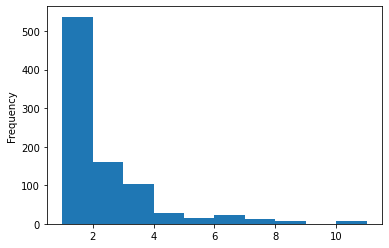

In [ ]:
all_data['Family_Size'] = all_data['Parch'] + all_data['SibSp'] + 1
all_data['Family_Size'].plot.hist()

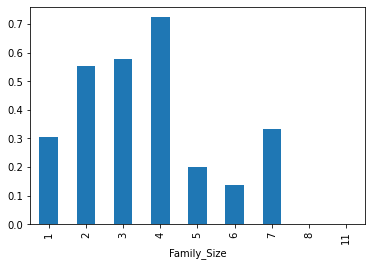

In [ ]:
all_data[['Family_Size', 'Survived']].groupby('Family_Size')['Survived'].mean().plot(kind='bar')

#### 8) 2) Create a new feature 'Fare_Category'
- Use qcut method of Pandas for creating 'Fare_Category' field from Fare so that we have 5 categories of Fare. Note that: 1) With qcut We decompose a distribution so that there are (approximately) the same number of cases ineach category. 2) qcut returns categorical data and we need to convert it to string using astype(str). Otherwise one-hot-encoder question below might have issues.
- Use value_counts() method to show the results. 
- Plot a bar chart to show the relationship between 'Fare_Category' and the 'Survival'

In [ ]:
all_data['Fare_Category'] = pd.qcut(all_data['Fare'],5)
all_data['Fare_Category'].value_counts()

(7.854, 10.5]        184
(21.075, 39.688]     181
(-0.001, 7.854]      179
(39.688, 512.329]    174
(10.5, 21.075]       171
Name: Fare_Category, dtype: int64

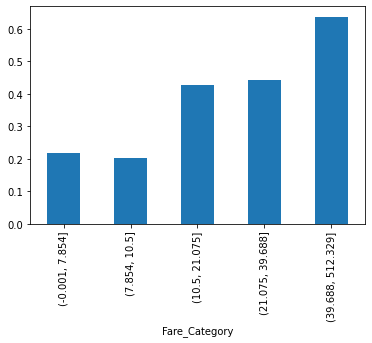

In [ ]:
all_data[['Fare_Category', 'Survived']].groupby('Fare_Category')['Survived'].mean().plot(kind='bar')

#### 8) 3) Create a new feature 'Age_Category'
- Use cut method of Pandas for creating 'Age_Category' field from Age so that we have 5 categories of Age. Note that: 1) With cut, the bins are formed based on the values of the variable, regardless of how many cases fall into a category. 2) cut returns categorical data and we need to convert it to string using astype(str). Otherwise one-hot-encoder question below might have issues.

- Use value_counts() method to show the results. 
- Plot a bar chart to show the relationship between 'Age_Category' and the 'Survival'


In [ ]:
all_data['Age_Category'] = pd.cut(all_data['Age'],5).astype(str)
all_data['Age_Category'].value_counts()

(16.336, 32.252]    493
(32.252, 48.168]    218
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age_Category, dtype: int64

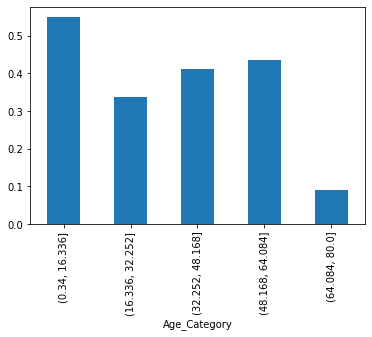

In [ ]:
all_data[['Age_Category', 'Survived']].groupby('Age_Category')['Survived'].mean().plot(kind='bar')

### 9) Encoders


#### 9) 1) Using LabelEncoder, create the 'Sex_Numeric' based on the values of the 'Sex' attribute.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_data['Sex'])

LabelEncoder()

#### 9) 2) Use OneHotEncoder to create new attributes for the 'Embarked' attribute.

Note: You can benefit from the following article for One-Hot-Encoding questions:
- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280

#### 9) 3) Use OneHotEncoder to create new attributes for the 'Fare_Category' attribute.

#### 9) 4) Use OneHotEncoder to create new attributes for the 'Age_Category' attribute.

### 9) 5) Create the correlation matrix for the all_data data frame and show the values for 'Survived' column in an descending order.